## PCA (25 points)
Select a set of grayscale images (e.g., faces, landscapes, or any other category).

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import os
from PIL import Image
from matplotlib.image import imread



In [78]:
# Loading all the images from the dataset directory.

dataset_dir = './datasets/grayscale-faces'

images_array = []
labels = []
label_names = []

img_size = (86, 86) 

# Loop over each subdirectory (character folder)
for label_id, character_name in enumerate(os.listdir(dataset_dir)):
    character_dir = os.path.join(dataset_dir, character_name)
    
    # Check if it's a directory
    if os.path.isdir(character_dir):
        print(f'Processing {character_name}...')
        label_names.append(character_name)
        
        # Loop over images in the character's directory
        for filename in os.listdir(character_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_path = os.path.join(character_dir, filename)
                
                # Load image
                img = Image.open(img_path)
                img.resize(img_size)
                img = img.convert('L')  
                
                # Append image to images_array
                images_array.append(img)
                labels.append(label_id)
images_array

Processing 09-Steve...
Processing 07-Nancy...
Processing 04-Dustin...
Processing 10-Joyce...
Processing 08-Jonathan...
Processing 01-Eleven...
Processing 02-Mike...
Processing 06-Max...
Processing 05-Lucas...
Processing 11-Jim...
Processing 03-Will...


[<PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L size=86x86>,
 <PIL.Image.Image image mode=L s

Normalize the images by scaling pixel values to a range [0, 1].

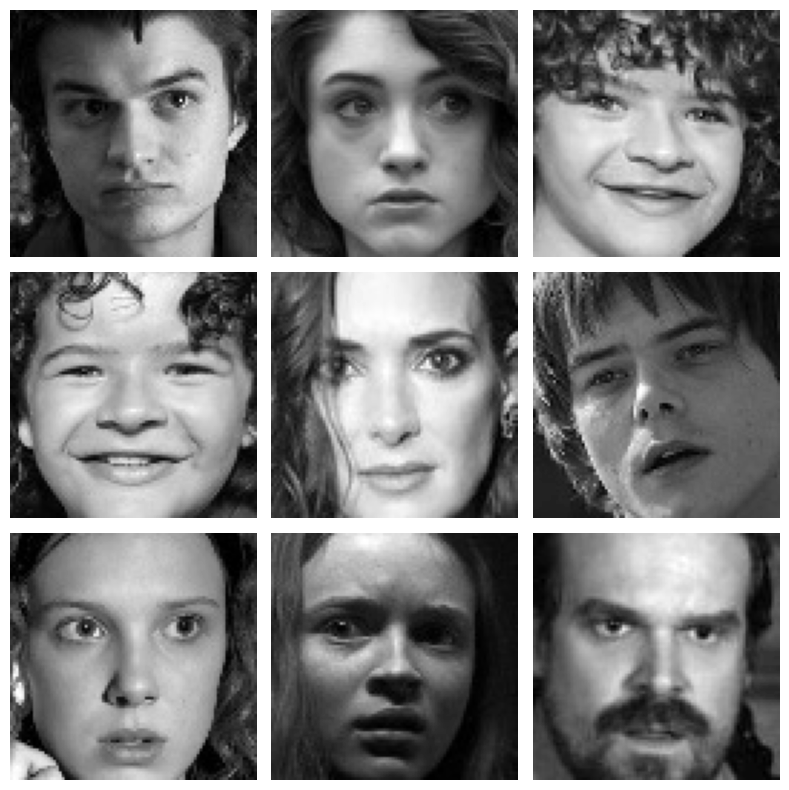

In [79]:
# Display original images
def display_selected_images(images_array, indices, grid_size=(3, 3)):
    # Create a grid of subplots
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(8, 8))
    
    # Loop over the grid and plot the selected images by index
    for i, ax in enumerate(axes.flat):
        if i < len(indices):
            ax.imshow(images_array[indices[i]], cmap='gray')
            ax.axis('off')  # Hide axes for better visualization
    
    plt.tight_layout()
    plt.show()

# Example usage: Display a 3x3 grid of images at specific indices
selected_indices = [32, 77, 150, 142,162, 230, 344, 450, 548]  # Custom indices for the images to display
display_selected_images(images_array, selected_indices)

In [80]:
# def image_preprocessing(images_array):
#     images_array_flattened = []

#     for img in images_array:
#         # Convert the image to a NumPy array and flatten it
#         # img_flattened = np.array(img).flatten() / 255  # Flatten the 86x86 image to a 1D array of 7396 elements
#         # images_array_flattened.append(img_flattened)

#     # Convert the list of flattened images into a 2D NumPy array
#     # images_array_2d = np.array(images_array_flattened)

#     return images_array_2d

# processed_images_array = image_preprocessing(images_array)
# processed_images_array

In [81]:
import numpy as np

def perform_pca(images_array, k):
    
    # Step 1: Convert the images into a 2D matrix
    images_array_flattened = []

    for img in images_array:
        # Convert the image into 2D matrix and normalize pixel values
        img_flattened = np.array(img).flatten() / 255  
        images_array_flattened.append(img_flattened)

    images_array_2d = np.array(images_array_flattened)
    print(f"2D Shape{images_array_2d.shape}")
    
    # Step 2: Compute the covariance matrix
    # Center the data by subtracting the mean image (normalize)
    mean_image = np.mean(images_array_2d, axis=0)
    centered_images = images_array_2d - mean_image

    # Covariance matrix (since each row is an image, we use rowvar=False)
    covariance_matrix = np.cov(centered_images, rowvar=False)
    print(f"Cov Shape{covariance_matrix.shape}")
    
    # Step 3: Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 4: Sort the eigenvectors by eigenvalues in descending order
    # Get indices of sorted eigenvalues (descending order)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    
    # Sort eigenvectors and eigenvalues by eigenvalue magnitude
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    sorted_eigenvalues = eigenvalues[sorted_indices]

    # Step 5: Select the top k eigenvectors (principal components)
    top_eigenvectors = sorted_eigenvectors[:, :k]

    # Step 6: Project the images onto the lower-dimensional subspace
    # Use the top k eigenvectors to project the data
    projected_images = np.dot(centered_images, top_eigenvectors)

    # Calculate the variance retained (use only real parts of eigenvalues)
    total_variance = np.sum(sorted_eigenvalues.real)
    retained_variance = np.sum(sorted_eigenvalues[:k].real)
    variance_retained_ratio = retained_variance / total_variance

    return projected_images, top_eigenvectors, mean_image, variance_retained_ratio, sorted_eigenvalues

In [82]:
# Running the PCA algorithm 
k = 50
projected_images, top_eigenvectors, mean_image, variance_retained, sorted_eigenvalues = perform_pca(images_array, k)

print(f"Projected images shape: {projected_images.shape}")
print(f"Variance retained with {k} PCs: {variance_retained * 100:.2f}%")

2D Shape(620, 7396)
Cov Shape(7396, 7396)
Projected images shape: (620, 50)
Variance retained with 50 PCs: 89.86%


In [83]:
# Before performing PCA on the images we had to do some preprocessing on the dataset. This included resizing 
# the images to a common size, converting them to grayscale, and flattening them into a single vector. All though all the images in the dataset seem 
# to be of the same size (86x86), we set the size explicitly to avoid any issues.

# Secondly, right now the images_array is a list of PIL image objects. We need to convert this to a numpy array before performing PCA. 

# Then we had to normalize the pixel values to be between 0 and 1. This is because PCA is sensitive to the scale of the data, and normalizing the pixel values. 
# Normally we would use StandardScaler to normalize the data, but since the pixel values are already between 0 and 255 
# (where 0 represents black and 255 represents white), we can simply divide by 255 to normalize the data.
# Scaling the pixels values by a factor of 255 will ensure that the pixel values are between 0 and 1.
# https://medium.com/@patelharsh7458/normalization-in-image-preprocessing-scaling-pixel-values-by-1-255-111b2fa496d4

# We also explicitly converted the images to grayscale using the convert('L') method, even though the images are already grayscale, also to 
# avoid any errors. 

## PCA Implementation:
Write a Python function to perform PCA on the images.

**Implement the following steps:**
1. Convert the image into a 2D matrix where each row represents an image and each column
represents a pixel value.
* After normalizing the pixel values we looped through all the images and used the .flatten() method to convert each image into a 1D array. 
2. Compute the covariance matrix of the image data.
* The covariance matrix is an important component in Principal Component Analysis (PCA). The aim of the covariance matrix is to capture how much several features vary together across the dataset. In this particular case, each pixel is a feature, and computing the covariance matrix allows us to understand the relationships between these pixels. 
* Before computing the covariance matrix, it's essential to mean-center the data. This involves subtracting the mean value of each feature (pixel) from the dataset so that each feature has a mean of zero. Mean-centering ensures that the principal components capture the directions of maximum variance

3. Calculate the eigenvalues and eigenvectors of the covariance matrix.
* The eigenvectors of the covariance matrix represent the directions (principal components) in which the data varies the most, and the corresponding eigenvalues indicate the magnitude of this variance.

4. Sort the eigenvectors based on the eigenvalues in descending order.
* To identify the principal components that capture the most variance, we need to sort the eigenvectors based on their corresponding eigenvalues in descending order. The eigenvectors with the largest eigenvalues represent the directions with the most significant variance in the data.
5. Select the top k eigenvectors to form the principal components.
* By selecting the top k eigenvectors, we form a lower-dimensional subspace that retains the most critical features of the data. This step reduces the dimensionality of the dataset while preserving as much variance as possible.

6. Project the original images onto the lower-dimensional subspace defined by the selected
principal components.

## Reconstruction of images

1. Using the selected principal components, reconstruct the images.
2. Compare the reconstructed images with the original images to observe the effects of
dimensionality reduction.

In [84]:
def display_reconstructed_images(projected_images, top_eigenvectors, mean_image, indices, original_shape, grid_size=(3, 3)):
    # Create a grid of subplots
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(8, 8))

    for i, ax in enumerate(axes.flat):
        if i < len(indices):
            # Select the projected image and reconstruct it
            projected_image = projected_images[indices[i]]
            
            # Reconstruct the image by reversing the PCA transformation
            reconstructed_image = np.dot(projected_image, top_eigenvectors.T) + mean_image
            
            # Use only the real part of the reconstructed image
            reconstructed_image = reconstructed_image.real
            
            # Reshape the reconstructed image back to the original 2D shape
            reconstructed_image_reshaped = reconstructed_image.reshape(original_shape)
            print(len(reconstructed_image_reshaped))
            
            # Plot the reconstructed image
            ax.imshow(reconstructed_image_reshaped, cmap='gray')
            ax.axis('off')  # Hide axes for better visualization
    
    plt.tight_layout()
    plt.show()

86
86
86
86
86
86
86
86
86


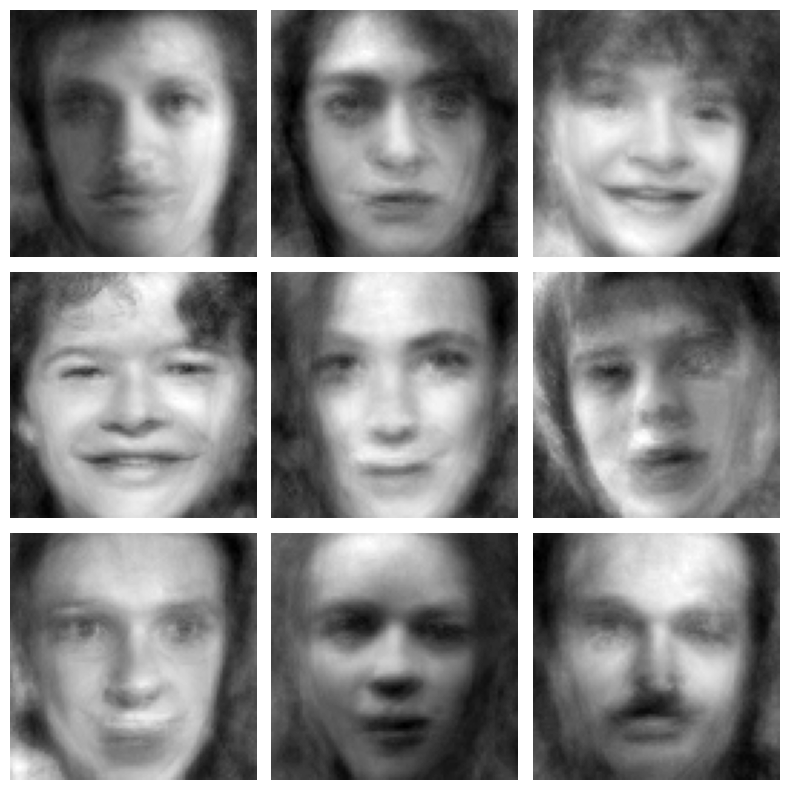

In [85]:
# Example usage: Display reconstructed images after PCA for selected indices
original_shape = (86, 86)  # Original image shape before flattening
selected_indices = [32, 77, 150, 142, 162, 230, 344, 450, 548]  # Same indices used before
display_reconstructed_images(projected_images, top_eigenvectors, mean_image, selected_indices, original_shape)

## Experimentation 

1. Vary the number of principal components (k) and observe the impact on the quality of the
reconstructed images.
2. Plot the variance explained by the principal components and determine the optimal number
of components that balances compression and quality.

In [86]:
# Plot variance explained by the principal components
def plot_variance_explained(eigenvalues):
    # Calculate the variance explained by each component
    variance_explained = eigenvalues / np.sum(eigenvalues)
    
    # Calculate cumulative variance explained
    cumulative_variance_explained = np.cumsum(variance_explained)
    
    # Plot the cumulative variance explained
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(1, len(cumulative_variance_explained) + 1), cumulative_variance_explained, marker='o', color='b', markersize=3)
    plt.xlim(1, 500) 
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Variance Explained')
    plt.title('Variance Explained by Principal Components')
    plt.grid(True)
    plt.show()

    return cumulative_variance_explained

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


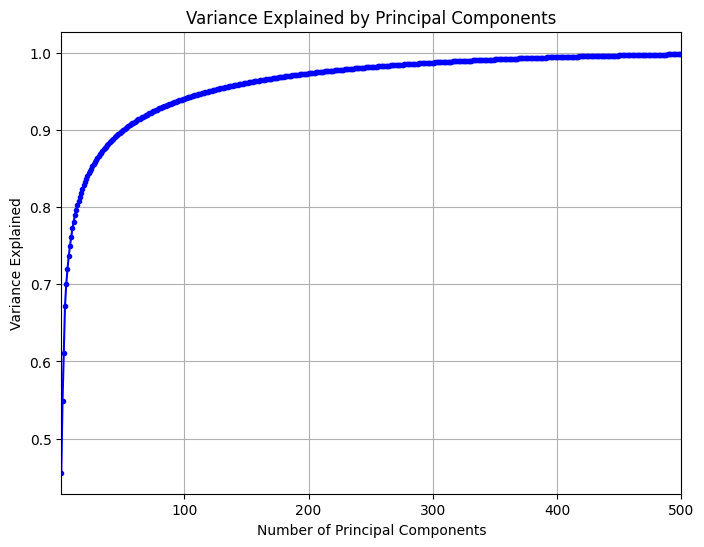

Optimal number of components to retain 95.0% variance: 120


In [87]:
cumulative_variance_explained = plot_variance_explained(sorted_eigenvalues)

threshold = 0.95
# Setting a threshold, to find optimal amount of principal components for the given threshold
optimal_k = np.argmax(cumulative_variance_explained >= threshold) + 1
print(f"Optimal number of components to retain {threshold * 100}% variance: {optimal_k}")

## Visual Analysis

1. Display the original images alongside the reconstructed images for different values of k.
2. Comment on the visual quality of the images and how much information is lost during
compression.

2D Shape(620, 7396)
Cov Shape(7396, 7396)
2D Shape(620, 7396)
Cov Shape(7396, 7396)
2D Shape(620, 7396)
Cov Shape(7396, 7396)
2D Shape(620, 7396)
Cov Shape(7396, 7396)
2D Shape(620, 7396)
Cov Shape(7396, 7396)


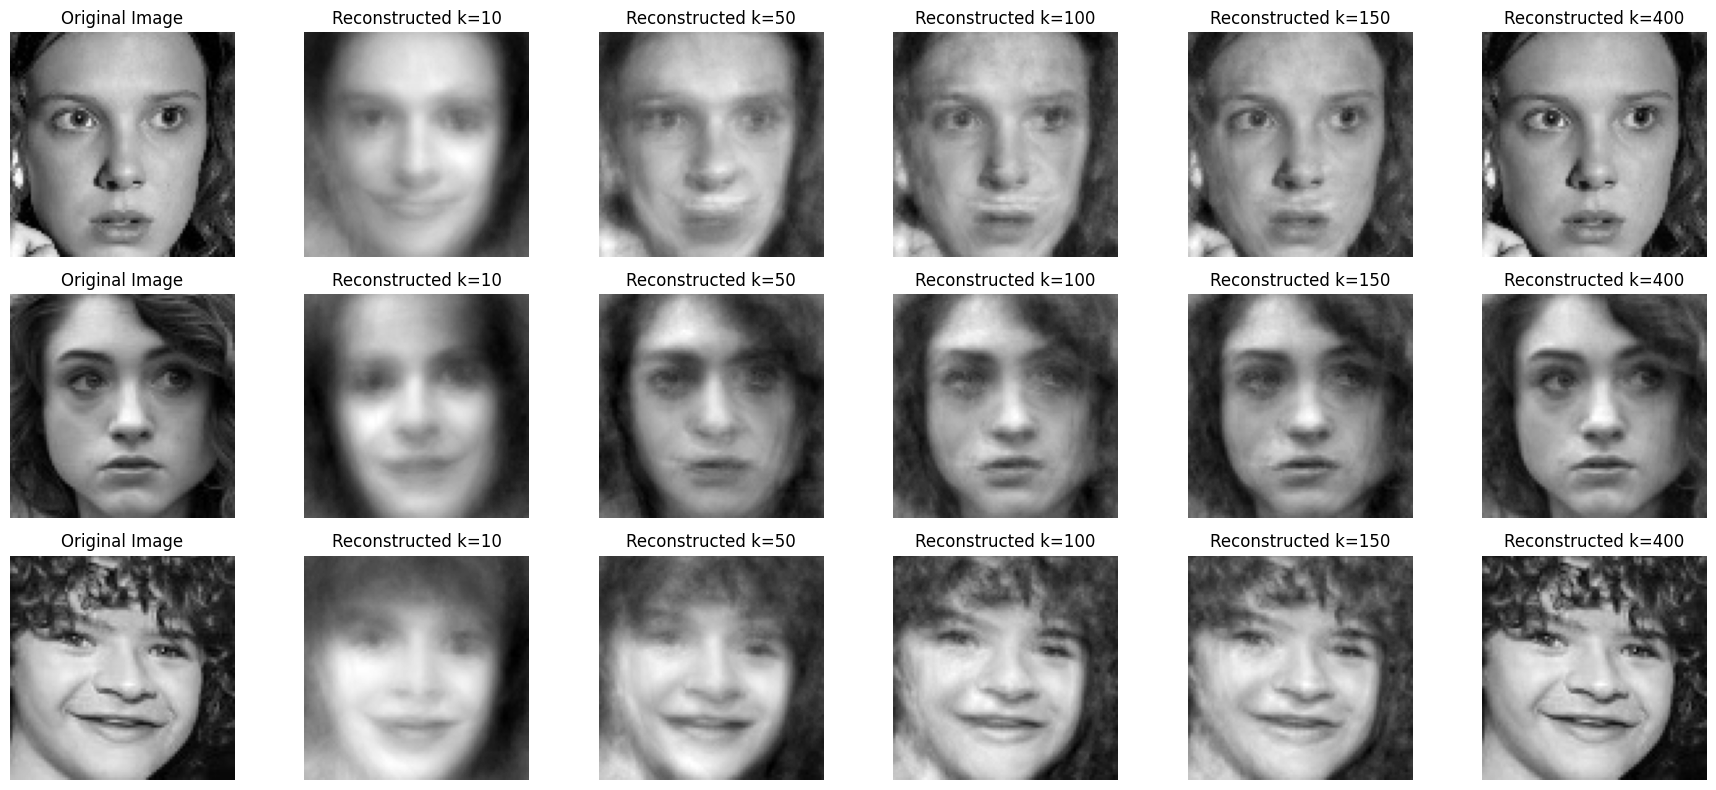

In [88]:
# Display Original and Reconstructed Images in a 3x6 grid
def display_original_and_reconstructed(images_array, projected_images_list, top_eigenvectors_list, mean_image_list, indices, original_shape, k_values):
    # Create a grid of subplots (3 rows for images, 6 columns for original + 5 k values)
    fig, axes = plt.subplots(3, len(k_values) + 1, figsize=(18, 8))  # Updated to 6 columns
    
    for row, idx in enumerate(indices[:3]):  # Show only the first 3 images in the grid
        # First column: Original images
        axes[row, 0].imshow(images_array[idx], cmap='gray')
        axes[row, 0].set_title("Original Image")
        axes[row, 0].axis('off')
        
        # Loop over k values and display reconstructed images
        for col, (projected_images, top_eigenvectors, mean_image, k) in enumerate(zip(projected_images_list, top_eigenvectors_list, mean_image_list, k_values), start=1):
            # Select the projected image and reconstruct it
            projected_image = projected_images[idx]
            
            # Reconstruct the image by reversing the PCA transformation
            reconstructed_image = np.dot(projected_image, top_eigenvectors.T) + mean_image
            
            # Use only the real part of the reconstructed image
            reconstructed_image = reconstructed_image.real
            
            # Reshape the reconstructed image back to the original 2D shape
            reconstructed_image_reshaped = reconstructed_image.reshape(original_shape)
            
            # Plot the reconstructed image
            axes[row, col].imshow(reconstructed_image_reshaped, cmap='gray')
            axes[row, col].set_title(f"Reconstructed k={k}")
            axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

# Define k values for PCA (5 different values now)
k_values = [10, 50, 100, 150, 400]  # Added one more k value (e.g., 250)

# List to store PCA results for different k values
projected_images_list = []
top_eigenvectors_list = []
mean_image_list = []

# Perform PCA for each value of k
for k in k_values:
    projected_images, top_eigenvectors, mean_image, variance_retained, sorted_eigenvalues = perform_pca(images_array, k)
    projected_images_list.append(projected_images)
    top_eigenvectors_list.append(top_eigenvectors)
    mean_image_list.append(mean_image)

# Example usage: Display original and reconstructed images in a 3x6 grid for 5 different k values
original_shape = (86, 86)  # Original image shape before flattening
selected_indices = [344, 77, 150]  # Show 3 images for the original and reconstructed views

display_original_and_reconstructed(images_array, projected_images_list, top_eigenvectors_list, mean_image_list, selected_indices, original_shape, k_values)

## Error Analysis

1. Compute the Mean Squared Error (MSE) between the original and reconstructed images.
2. Analyze the trade-off between compression and reconstruction error.

In [89]:
import numpy as np

def reconstruct_images_all(projected_images, top_eigenvectors, mean_image, original_shape):
    # List to store reconstructed images
    reconstructed_images = []

    # Loop over all images in the projected_images array
    for i in range(len(projected_images)):
        # Select the projected image and reconstruct it
        projected_image = projected_images[i]
        
        # Reconstruct the image by reversing the PCA transformation
        reconstructed_image = np.dot(projected_image, top_eigenvectors.T) + mean_image
        
        # Use only the real part of the reconstructed image
        reconstructed_image = reconstructed_image.real
        
        # Reshape the reconstructed image back to the original 2D shape
        reconstructed_image_reshaped = reconstructed_image.reshape(original_shape)
        
        # Save the reconstructed image
        reconstructed_images.append(reconstructed_image_reshaped)
    
    # Return the list of reconstructed images
    return reconstructed_images

# Example usage
original_shape = (86, 86)  # Assuming the original image size is 86x86
reconstructed_images = reconstruct_images_all(projected_images, top_eigenvectors, mean_image, original_shape)


In [90]:
from sklearn.metrics import mean_squared_error

In [91]:
original_shape = (86, 86)  
reconstruct_images_all(projected_images, top_eigenvectors, mean_image, original_shape)

[array([[0.12068959, 0.14674142, 0.12223722, ..., 0.15740181, 0.10095232,
         0.06083033],
        [0.18965377, 0.09773955, 0.10804211, ..., 0.10688232, 0.15823851,
         0.07972376],
        [0.10550363, 0.08549285, 0.11315727, ..., 0.14623742, 0.12690758,
         0.07931721],
        ...,
        [0.04844801, 0.05392596, 0.041238  , ..., 0.30622081, 0.31662115,
         0.3725147 ],
        [0.08788699, 0.12295824, 0.07835709, ..., 0.72248395, 0.53453084,
         0.34321963],
        [0.13757349, 0.11765178, 0.07955685, ..., 0.80918102, 0.83407936,
         0.34192016]]),
 array([[0.01682518, 0.04256258, 0.07229686, ..., 0.1734752 , 0.33330245,
         0.12863672],
        [0.02054781, 0.05547008, 0.06694612, ..., 0.01036415, 0.37098261,
         0.09960989],
        [0.02622314, 0.06017244, 0.07509336, ..., 0.0245408 , 0.12795646,
         0.16825825],
        ...,
        [0.04087577, 0.1508518 , 0.14277319, ..., 0.60949814, 0.6017184 ,
         0.61116281],
        [0.0

In [76]:
def compute_mse(original_images, reconstructed_images):
    mse_list = []
        
    # Loop over all images in the original and reconstructed arrays
    for idx in range(len(original_images)):
        # Flatten and normalize the original image
        original_image = np.array(original_images[idx]).flatten() / 255.0  # Normalize between 0 and 1
        
        # Flatten the reconstructed image (already normalized)
        reconstructed_image = np.array(reconstructed_images[idx]).flatten()
        
        # Compute MSE between the original and reconstructed image
        mse = mean_squared_error(original_image, reconstructed_image)
        mse_list.append(mse)
    
    # Compute the average MSE over all images
    average_mse = np.mean(mse_list)
    
    return average_mse, mse_list

average_mse, mse_list = compute_mse(images_array, reconstructed_images)

print(f"Mean Squared Error for all images: {average_mse:.5f}")


Mean Squared Error for all images: 0.00023
